In [38]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# import data into dataframe
data = pd.read_csv('results-20151107-172000.csv')
data[:1]

,d_medallion,d_hack_license,d_vendor_id,d_rate_code,d_store_and_fwd_flag,d_pickup_datetime,d_dropoff_datetime,d_passenger_count,d_trip_time_in_secs,d_trip_distance,...,f_hack_license,f_vendor_id,f_pickup_datetime,f_payment_type,f_fare_amount,f_surcharge,f_mta_tax,f_tip_amount,f_tolls_amount,f_total_amount
0,FFD1575DA3F4DB85CCEC9FFBEAE16AEF,44F1D8A999F6FE1AFC854CEA5CB83BBD,VTS,2,null,2013-12-19 19:43:00,2013-12-19 20:49:00,1,3960,15.67,...,44F1D8A999F6FE1AFC854CEA5CB83BBD,VTS,2013-12-19 19:43:00,CRD,52,0,0.5,5,0,57.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09DDEA90>]], dtype=object)

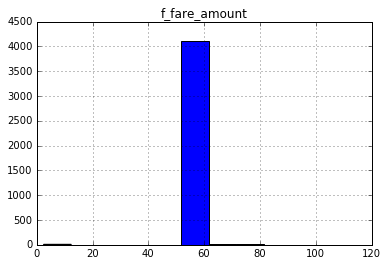

In [35]:
# visualize the spread of fare amount
pd.DataFrame.hist(data, 'f_fare_amount')

# the fare amounts <$20 look questionable

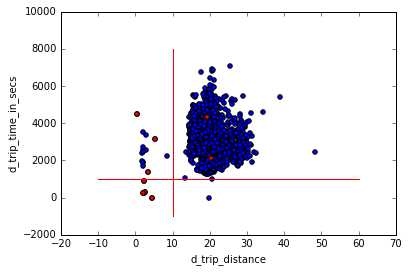

In [54]:
# visualize trip time as a function of trip distance
ax = data.plot(kind='scatter', x='d_trip_distance', y='d_trip_time_in_secs')

# trip distance <10 miles and trip time <1000 sec look questionable
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.plot([xmin, xmax], [1000, 1000], 'r-')
plt.plot([10, 10], [ymin, ymax], 'r-')

# overlay the points with low fare amounts
tmp = data.loc[data['f_fare_amount'] < 20]
tmp.plot(kind='scatter', x='d_trip_distance', y='d_trip_time_in_secs', color='red', ax=ax)

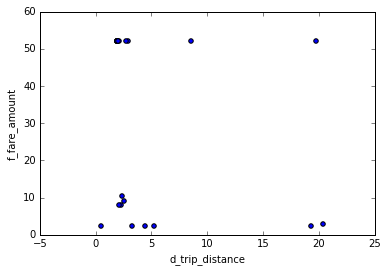

In [47]:
# lets take another look at the questionable data points
questionable = data.loc[(data['f_fare_amount'] < 20) | (data['d_trip_time_in_secs'] < 1000) | (data['d_trip_distance'] < 10)]
questionable.plot(kind='scatter', x='d_trip_distance', y='f_fare_amount')

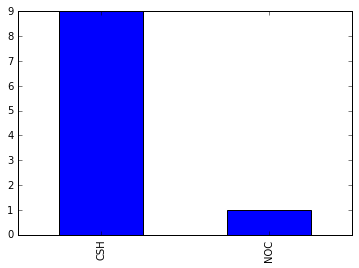

In [48]:
# trips with flat fares are fine. let's look at the other data points
suspicious = questionable.loc[questionable['f_fare_amount'] < 20]
suspicious['f_payment_type'].value_counts().plot(kind='bar')

# interesting.. all of the suspicious data points are paid in cash or NOC (what's that?)

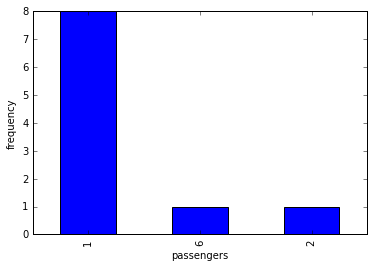

In [90]:
# perhaps number of passengers has some indication
suspicious['d_passenger_count'].value_counts().plot(kind='bar')
plt.xlabel('passengers')
plt.ylabel('frequency')

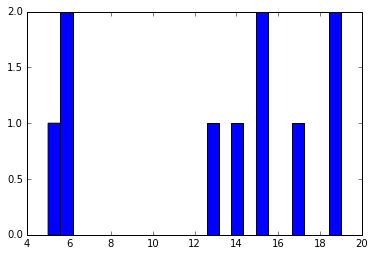

In [93]:
# perhaps time of day has some indication
hours = pd.DatetimeIndex(suspicious['d_pickup_datetime']).hour
f = plt.figure()
plt.hist(hours, bins=24)
plt.show()
plt.xlabel('hour of day')
plt.ylabel('frequency')

next steps:
1. get more data from the rest of the peninsula
2. find other trends: repeat hack licenses, repeat medallions